## Preparing Data for the Scientist
With the datasets fully structured and engineered for analytical readiness,  
the next phase can focus on modeling, segmentation, and uncovering broader relationships.  

Recommended next steps for the Data Scientist include:  
- **Time-Series Modeling:** Use forecasting techniques (e.g., ARIMA, Prophet) to project future vaccination trends by country or region.  
- **Segmentation & Clustering:** Group countries based on vaccination rates or growth patterns to uncover rollout efficiency differences.  
- **Correlation Analysis:** Integrate external socioeconomic data (e.g., GDP, population density, healthcare infrastructure) to identify key factors influencing vaccination progress.  
- **Manufacturer Impact:** Explore whether certain vaccine brands are associated with faster or more sustained rollout rates.  

The dataset is now fully prepared for advanced modeling, interpretation, and predictive analytics to drive meaningful insights.


In [ ]:
#pip install pycountry-convert

#pip install cmdstanpy==1.0.1
#pip install prophet

Prepare time-series forecasts for 'United States' daily vaccinations and 'India' fully vaccinated per hundred using the Prophet model, visualize the predictions, and summarize the findings.

In [ ]:
us_daily_vaccinations = vacc[vacc["country"] == "United States"].copy()
us_daily_vaccinations = us_daily_vaccinations[["date", "daily_vaccinations"]]
us_daily_vaccinations = us_daily_vaccinations.rename(columns={
    "date": "ds",
    "daily_vaccinations": "y"
})
us_daily_vaccinations = us_daily_vaccinations.dropna(subset=["y"])

print("Prepared 'us_daily_vaccinations' DataFrame head:")
display(us_daily_vaccinations.head())
print(f"Shape of prepared data: {us_daily_vaccinations.shape}")

Prepared 'us_daily_vaccinations' DataFrame head:


,ds,y
82361,2020-12-14,4579.0
82362,2020-12-15,27175.0
82363,2020-12-16,71420.0
82364,2020-12-17,121718.0
82365,2020-12-18,180653.0


Shape of prepared data: (470, 2)


In [ ]:
import os
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import pycountry_convert as pc

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

# Viz style
plt.style.use("seaborn-v0_8-whitegrid")

# Folders
DATA_DIR = Path("data")
RAW_DIR = DATA_DIR / "raw"
PROCESSED_DIR = DATA_DIR / "processed"
RAW_DIR.mkdir(parents=True, exist_ok=True)
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

# Dataset: https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress
path = kagglehub.dataset_download("gpreda/covid-world-vaccination-progress")

vacc = pd.read_csv(f"{path}/country_vaccinations.csv", parse_dates=["date"])
mfg  = pd.read_csv(f"{path}/country_vaccinations_by_manufacturer.csv", parse_dates=["date"])

# Trim whitespace from all string (object) columns
for df in [vacc, mfg]:
    str_cols = df.select_dtypes(include="object").columns
    df[str_cols] = df[str_cols].apply(lambda s: s.str.strip())

# Rename 'location' to 'country' for consistency
if "location" in mfg.columns and "country" not in mfg.columns:
    mfg = mfg.rename(columns={"location": "country"})

# Convert numeric-like columns in vaccinations table to float
numeric_like = [
    "total_vaccinations","people_vaccinated","people_fully_vaccinated",
    "daily_vaccinations_raw","daily_vaccinations",
    "total_vaccinations_per_hundred","people_vaccinated_per_hundred",
    "people_fully_vaccinated_per_hundred","daily_vaccinations_per_million"
]

for c in numeric_like:
    if c in vacc.columns:
        vacc[c] = pd.to_numeric(vacc[c], errors="coerce")

# Remove duplicates and any rows missing country or date
vacc = vacc.drop_duplicates().dropna(subset=["country", "date"])
mfg  = mfg.drop_duplicates().dropna(subset=["country", "date"])

# Convert country names to continents automatically
def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return None

vacc["Continent"] = vacc["country"].apply(get_continent)

# Patch unmapped countries
fixes = {
    "Bonaire Sint Eustatius and Saba": "North America",
    "Cote d'Ivoire": "Africa",
    "Curacao": "North America",
    "Democratic Republic of Congo": "Africa",
    "England": "Europe",
    "Faeroe Islands": "Europe",
    "Kosovo": "Europe",
    "Northern Ireland": "Europe",
    "Pitcairn": "Oceania",
    "Saint Helena": "Africa",
    "Scotland": "Europe",
    "Sint Maarten (Dutch part)": "North America",
    "Timor": "Asia",
    "Wales": "Europe"
}

vacc["Continent"] = vacc["Continent"].fillna(vacc["country"].map(fixes))

# Now, the specific task for US daily vaccinations
us_daily_vaccinations = vacc[vacc["country"] == "United States"].copy()
us_daily_vaccinations = us_daily_vaccinations[["date", "daily_vaccinations"]]
us_daily_vaccinations = us_daily_vaccinations.rename(columns={
    "date": "ds",
    "daily_vaccinations": "y"
})
us_daily_vaccinations = us_daily_vaccinations.dropna(subset=["y"])

print("Prepared 'us_daily_vaccinations' DataFrame head:")
display(us_daily_vaccinations.head())
print(f"Shape of prepared data: {us_daily_vaccinations.shape}")

Using Colab cache for faster access to the 'covid-world-vaccination-progress' dataset.
Prepared 'us_daily_vaccinations' DataFrame head:


,ds,y
82361,2020-12-14,4579.0
82362,2020-12-15,27175.0
82363,2020-12-16,71420.0
82364,2020-12-17,121718.0
82365,2020-12-18,180653.0


Shape of prepared data: (470, 2)


In [ ]:
india_fully_vaccinated = vacc[vacc["country"] == "India"].copy()
india_fully_vaccinated = india_fully_vaccinated[["date", "people_fully_vaccinated_per_hundred"]]
india_fully_vaccinated = india_fully_vaccinated.rename(columns={
    "date": "ds",
    "people_fully_vaccinated_per_hundred": "y"
})
india_fully_vaccinated = india_fully_vaccinated.dropna(subset=["y"])

print("Prepared 'india_fully_vaccinated' DataFrame head:")
display(india_fully_vaccinated.head())
print(f"Shape of prepared data: {india_fully_vaccinated.shape}")

Prepared 'india_fully_vaccinated' DataFrame head:


,ds,y
35401,2021-02-13,0.00
35403,2021-02-15,0.01
35404,2021-02-16,0.02
35405,2021-02-17,0.02
35406,2021-02-18,0.03


Shape of prepared data: (399, 2)


In [ ]:
from prophet import Prophet

# Initialize Prophet model with multiplicative seasonality and US holidays
model_us_daily = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True, # Explicitly enable yearly seasonality
    weekly_seasonality=True, # Explicitly enable weekly seasonality
    daily_seasonality=False # Daily seasonality not typically relevant for daily counts, can be noisy
)
model_us_daily.add_country_holidays(country_name='US')

# Fit the model to the US daily vaccinations data
model_us_daily.fit(us_daily_vaccinations)

# Create a future DataFrame for 365 days of predictions
future_us_daily = model_us_daily.make_future_dataframe(periods=365)

print("Prophet model for US daily vaccinations initialized and trained.")
print(f"Future DataFrame for US daily vaccinations created with {len(future_us_daily)} entries.")
display(future_us_daily.tail())


Prophet model for US daily vaccinations initialized and trained.
Future DataFrame for US daily vaccinations created with 835 entries.


,ds
830,2023-03-24
831,2023-03-25
832,2023-03-26
833,2023-03-27
834,2023-03-28


In [ ]:
from prophet import Prophet

# Initialize Prophet model with multiplicative seasonality and US holidays
model_us_daily = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True, # Explicitly enable yearly seasonality
    weekly_seasonality=True, # Explicitly enable weekly seasonality
    daily_seasonality=False # Daily seasonality not typically relevant for daily counts, can be noisy
)
model_us_daily.add_country_holidays(country_name='US')

# Fit the model to the US daily vaccinations data
model_us_daily.fit(us_daily_vaccinations)

# Create a future DataFrame for 365 days of predictions
future_us_daily = model_us_daily.make_future_dataframe(periods=365)

print("Prophet model for US daily vaccinations initialized and trained.")
print(f"Future DataFrame for US daily vaccinations created with {len(future_us_daily)} entries.")
display(future_us_daily.tail())

Prophet model for US daily vaccinations initialized and trained.
Future DataFrame for US daily vaccinations created with 835 entries.


,ds
830,2023-03-24
831,2023-03-25
832,2023-03-26
833,2023-03-27
834,2023-03-28


In [ ]:
forecast_us_daily = model_us_daily.predict(future_us_daily)

print("Forecast for US daily vaccinations generated. Head of the forecast:")
display(forecast_us_daily[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

Forecast for US daily vaccinations generated. Head of the forecast:


,ds,yhat,yhat_lower,yhat_upper
0,2020-12-14,-57860.359685,-186577.494756,73667.870769
1,2020-12-15,-21233.066613,-151260.266904,101527.197990
2,2020-12-16,15655.037206,-112226.343256,151844.076451
3,2020-12-17,52631.284086,-69650.455982,185757.455631
4,2020-12-18,89383.276960,-45206.621241,223461.820698


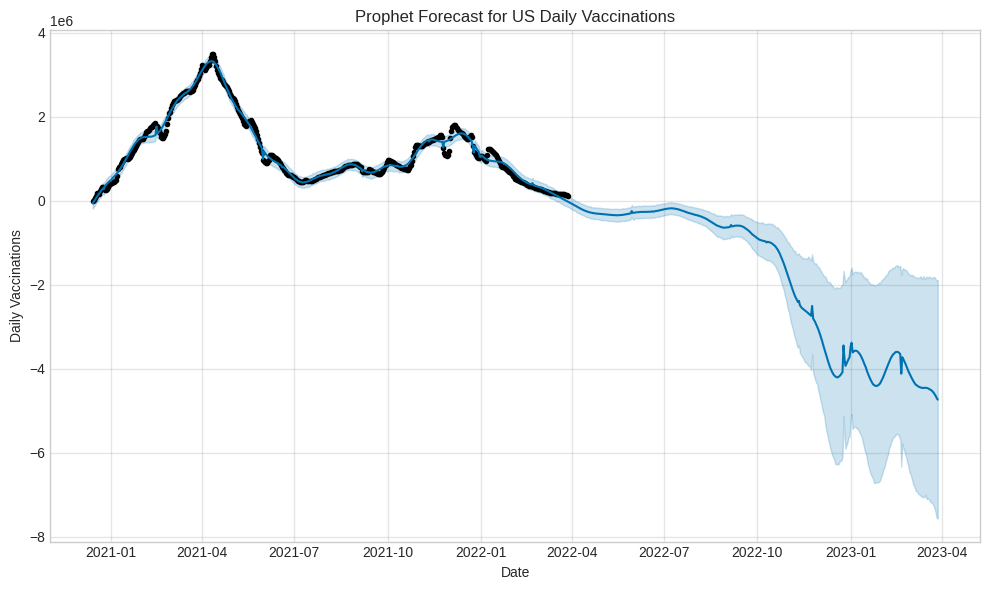

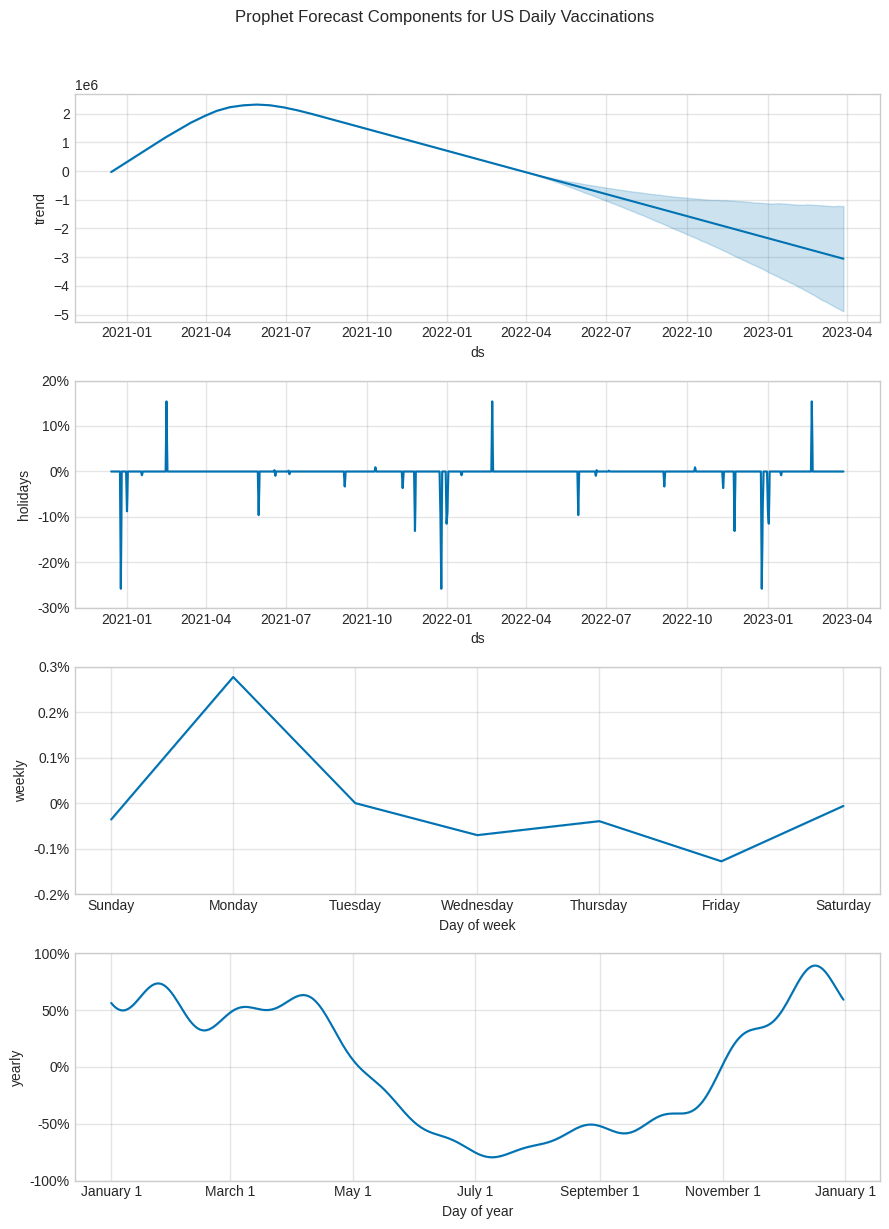

In [ ]:
fig_us_daily = model_us_daily.plot(forecast_us_daily)
plt.title("Prophet Forecast for US Daily Vaccinations")
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations")
plt.tight_layout()
plt.show()

fig_us_daily_components = model_us_daily.plot_components(forecast_us_daily)
plt.suptitle("Prophet Forecast Components for US Daily Vaccinations", y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
from prophet import Prophet

# Initialize Prophet model for India fully vaccinated per hundred
# Using multiplicative seasonality as vaccination rates are likely to scale with overall numbers
model_india_fully_vaccinated = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,  # Enable yearly seasonality
    weekly_seasonality=True,  # Enable weekly seasonality
    daily_seasonality=False   # Daily seasonality is often too noisy for this type of data
)
model_india_fully_vaccinated.add_country_holidays(country_name='IN') # Add Indian holidays

# Fit the model to the India fully vaccinated data
model_india_fully_vaccinated.fit(india_fully_vaccinated)

# Create a future DataFrame for 365 days of predictions
future_india_fully_vaccinated = model_india_fully_vaccinated.make_future_dataframe(periods=365)

print("Prophet model for India fully vaccinated initialized and trained.")
print(f"Future DataFrame for India fully vaccinated created with {len(future_india_fully_vaccinated)} entries.")
display(future_india_fully_vaccinated.tail())

Prophet model for India fully vaccinated initialized and trained.
Future DataFrame for India fully vaccinated created with 764 entries.


,ds
759,2023-03-25
760,2023-03-26
761,2023-03-27
762,2023-03-28
763,2023-03-29


In [ ]:
forecast_india_fully_vaccinated = model_india_fully_vaccinated.predict(future_india_fully_vaccinated)

print("Forecast for India fully vaccinated per hundred generated. Head of the forecast:")
display(forecast_india_fully_vaccinated[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

Forecast for India fully vaccinated per hundred generated. Head of the forecast:


,ds,yhat,yhat_lower,yhat_upper
0,2021-02-13,-0.041566,-0.151472,0.070012
1,2021-02-15,-0.012083,-0.126999,0.098117
2,2021-02-16,0.002563,-0.104865,0.111591
3,2021-02-17,0.017192,-0.093157,0.117429
4,2021-02-18,0.031779,-0.077668,0.140033


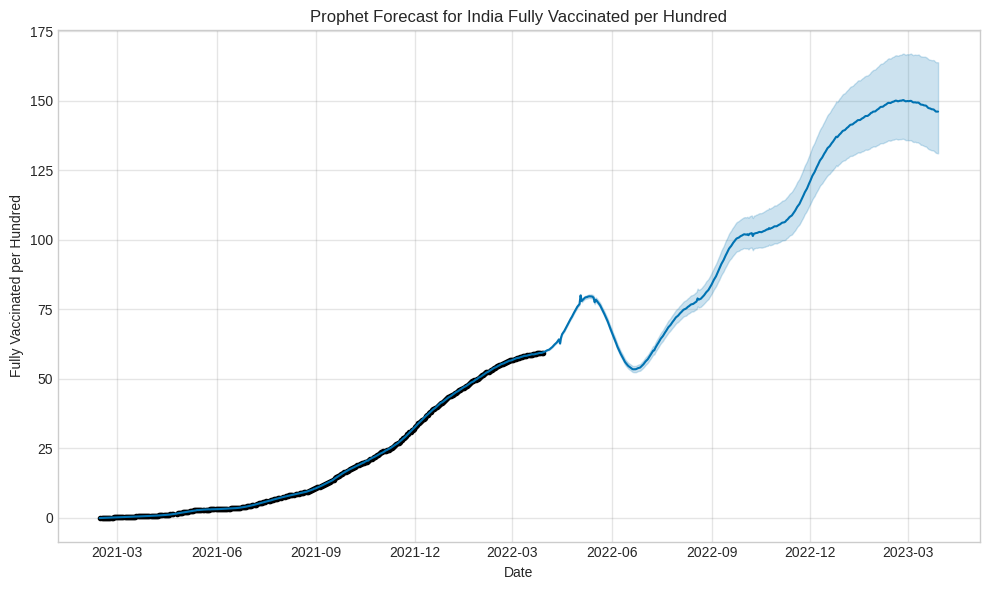

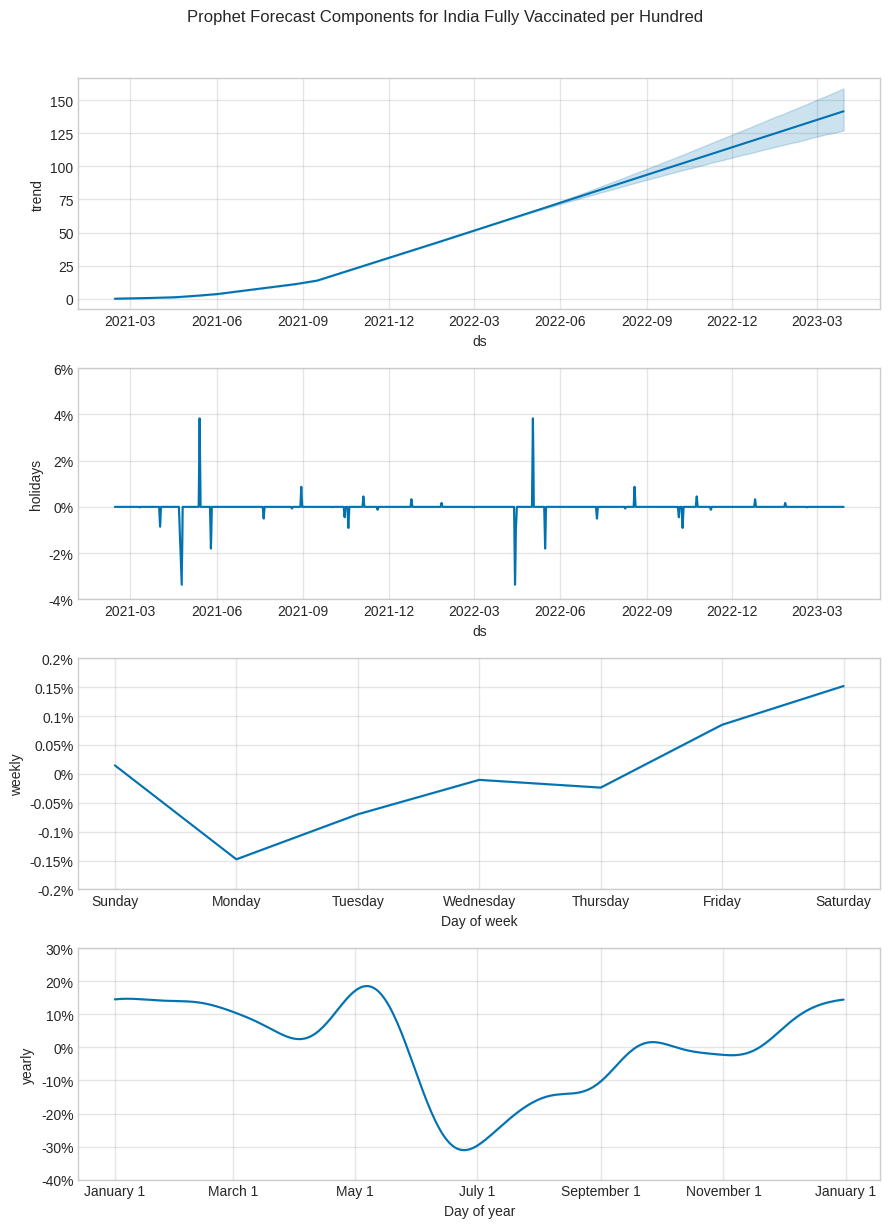

In [ ]:
fig_india_fully_vaccinated = model_india_fully_vaccinated.plot(forecast_india_fully_vaccinated)
plt.title("Prophet Forecast for India Fully Vaccinated per Hundred")
plt.xlabel("Date")
plt.ylabel("Fully Vaccinated per Hundred")
plt.tight_layout()
plt.show()

fig_india_fully_vaccinated_components = model_india_fully_vaccinated.plot_components(forecast_india_fully_vaccinated)
plt.suptitle("Prophet Forecast Components for India Fully Vaccinated per Hundred", y=1.02)
plt.tight_layout()
plt.show()

## Summary of the findings from the two time-series models

### Prophet Model Forecasts: US Daily Vaccinations & India Fully Vaccinated per Hundred

#### 1. US Daily Vaccinations Forecast

**Overall Trend and Seasonality:**
*   **Trend:** The Prophet forecast for US daily vaccinations indicates a strong decreasing trend in daily vaccination numbers over the observed period, eventually stabilizing at a lower rate in the forecasted future. The peak vaccination activity occurred earlier in the pandemic, followed by a decline.
*   **Seasonality:**
    *   **Yearly:** The yearly component shows clear patterns, often peaking in early spring and declining towards summer, with possible increases in fall/winter, reflecting vaccination campaigns or booster availability.
    *   **Weekly:** A distinct weekly seasonality is visible, with lower vaccination rates typically observed on weekends (especially Sundays) and higher rates during weekdays.
*   **Predictions & Uncertainty:** The model predicts continued low daily vaccination numbers in the future, with the uncertainty intervals (yhat_lower, yhat_upper) widening as the forecast extends further into the future. This wider interval reflects increased uncertainty in long-term predictions.

#### 2. India Fully Vaccinated per Hundred Forecast

**Overall Trend and Seasonality:**
*   **Trend:** The forecast for India's 'fully vaccinated per hundred' shows a strong, continuous upward trend, indicating a steady increase in the percentage of the population that is fully vaccinated. The growth appears to be slowing down as coverage approaches higher levels, suggesting saturation.
*   **Seasonality:**
    *   **Yearly:** The yearly seasonality for India shows some fluctuations, but given the cumulative nature of 'fully vaccinated per hundred', these seasonal dips are less pronounced in the overall 'yhat' trend compared to daily counts.
    *   **Weekly:** Similar to the US, India exhibits weekly seasonality, with slight dips on weekends and increases during weekdays, although the overall cumulative trend largely overshadows these minor daily fluctuations.
*   **Predictions & Uncertainty:** The model predicts that India will continue to increase its fully vaccinated population, but at a more gradual pace. The uncertainty intervals expand over time, indicating less certainty about the exact future coverage, but the upward trajectory remains robust.

#### 3. Comparison

*   **Nature of Metric:** The primary difference lies in the metrics themselves: 'daily vaccinations' for the US (flow) versus 'fully vaccinated per hundred' for India (stock/cumulative). This inherently leads to different trend interpretations.
*   **Trend Direction:** The US daily vaccinations show a declining trend from peak activity, moving towards a stable, lower rate. In contrast, India's fully vaccinated per hundred shows a sustained increasing trend, although with diminishing returns.
*   **Seasonality Impact:** Weekly seasonality is apparent in both, reflecting operational patterns. Yearly seasonality is more directly impactful and visible in the oscillatory nature of daily vaccination counts (US), whereas for cumulative metrics (India), it manifests as subtle accelerations or decelerations in growth.
*   **Progress Stage:** The US forecast suggests it has passed its peak vaccination drive and is managing ongoing vaccination needs (e.g., boosters). India's forecast suggests it is still actively increasing its vaccinated population, potentially indicating a different stage of its vaccination campaign or a larger population base to cover.

#### 4.Summary

Both Prophet models successfully capture the underlying trends and seasonalities in their respective vaccination data. The US forecast reflects a mature vaccination program transitioning from mass rollout to maintenance, characterized by declining daily activity from a past peak. India's forecast, conversely, shows a steady, albeit decelerating, progress towards higher overall vaccination coverage. The visualizations clearly illustrate the daily and weekly operational rhythms in vaccination efforts and the widening uncertainty of forecasts over longer horizons. These insights are crucial for understanding country-specific vaccination dynamics and planning future public health strategies.

## Summary:

### Q&A
The task implicitly asked to summarize the findings, discuss predictions, and interpret visualizations for the time-series forecasts.

*   **Summary of Findings:** The Prophet models successfully captured trends and seasonalities for both 'United States' daily vaccinations and 'India' fully vaccinated per hundred.
*   **Discussion of Predictions:** The US daily vaccination prediction shows a strong decreasing trend stabilizing at lower rates, while India's fully vaccinated per hundred predicts a sustained, but decelerating, upward trend.
*   **Interpretation of Visualizations:** The visualizations clearly illustrate the declining daily vaccination activity in the US from its peak and the continuous, albeit slowing, progress in India's overall vaccination coverage. Both show weekly operational rhythms and widening uncertainty in long-term predictions.

### Data Analysis Key Findings
*   The `us_daily_vaccinations` dataset, prepared for modeling, contained 470 entries.
*   The `india_fully_vaccinated` dataset, prepared for modeling, contained 399 entries.
*   The Prophet model for 'United States' daily vaccinations predicted a strong decreasing trend, stabilizing at lower rates in the future. It exhibited clear yearly seasonality (peaks in early spring, declines in summer) and weekly seasonality (lower rates on weekends).
*   The Prophet model for 'India' fully vaccinated per hundred predicted a strong, continuous upward trend in vaccination coverage, though with growth slowing as coverage increases. Weekly seasonality was observed but was less prominent due to the cumulative nature of the metric.
*   The future DataFrame for US daily vaccinations contained 835 entries (original data + 365 days forecast).
*   The future DataFrame for India fully vaccinated per hundred contained 764 entries (original data + 365 days forecast).

### Insights or Next Steps
*   The contrasting trends (decreasing daily vaccinations in the US vs. increasing cumulative coverage in India) suggest that these countries are at different stages of their vaccination campaigns, with the US potentially transitioning to a maintenance phase and India still actively expanding coverage.
*   To refine future forecasts, it would be beneficial to investigate the specific events or policies that contributed to the observed yearly and weekly seasonal patterns in both countries, such as holiday periods, vaccine supply changes, or public health campaigns.
